In [2]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
from sllib.conversions.geo_conversions import north_east_to_lat_lon, mps2knots, lat_lon_to_north_east
import numpy as np

path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_01e88fc6af"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_3cb9cf2af3"
#215811000
#219016555
#219023834
#, mmsi=215811000
env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [500, 500, 1500, 1500])
#env = ScmIrlEnv(path, awareness_zone = [500, 500, 1500, 1500])

#env.step([2,1])
env.mmsi

print(env.get_vessel_metadata())



print(env.agent_state)

timestep = env.timestep




#while not env.done:
for i in range(50):
    timestep = env.timestep
    action = env.get_action_from_vessel(timestep)
    agent_state, reward, terminate, done, info = env.step(action)

    #print(action)
    #print(ret)

#     # create random action
#     # action = env.action_space.sample()
#     # # take action
#     # env.step(action)
#     env.step([2.0055,i])

env.close()

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0
VesselMetaData(mmsi=215811000, ship_type='Tanker', width=42.0, length=244.0, draught=15.0, nav_status=4)
VesselState(timestamp=0.0, lat=121.62966767843639, lon=1847.8675034043845, sog=4.915240363636364, cog=0.4191963530699095)


In [2]:
env.observation_matrix.shape

(3000, 1000)

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


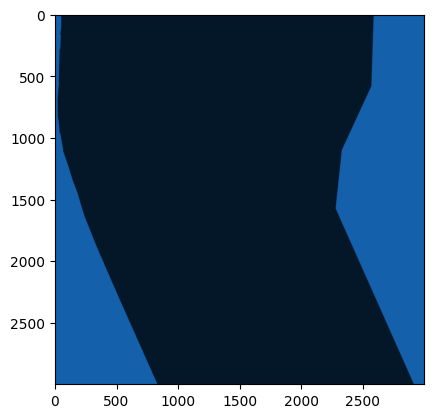

In [1]:
from scm_irl.env.scm_irl_env import ScmIrlEnv
import matplotlib.pyplot as plt
from scm_irl.utils.plot_scenario import plot_cropbox_area, modulate_color, cmap_seachart
path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_01e88fc6af"
#path = "/home/rolando/Documents/DTU/SCMarine/scm_irl/data/raw/scenario_3cb9cf2af3"
#215811000
#219016555
#219023834
#, mmsi=215811000
env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [2000, 2000, 1500, 1500])

cmap = cmap_seachart()

plt.imshow(env.observation_matrix/60, cmap=cmap, vmin=0, vmax=1)

In [3]:
import matplotlib.patches as patches

from scm_irl.env.scm_irl_env import ScmIrlEnv
import matplotlib.pyplot as plt
from scm_irl.utils.plot_scenario import plot_cropbox_area, modulate_color, cmap_seachart
path = "/home/rolando/Documents/DTU/SCMarine/ais-and-charts-sample/ais_data/scenario_2a66ceaf61"
env = ScmIrlEnv(path, mmsi=215811000, awareness_zone = [2000, 2000, 1500, 1500])

depths_lands_inside = env._get_observation_matrix()

crop_box = env._create_crop_box()
# plot the crop box



color = 'dodgerblue'
for depth in depths_lands_inside:
    polygon = patches.Polygon([(x[0], x[1]) for x in depth[0].exterior.coords], fill=True, color=modulate_color(color, 1- depth[1]/100))
    plt.gca().add_patch(polygon)


# get the limits of the polygons
x_min = min([x[0] for depth in depths_lands_inside for x in depth[0].exterior.coords])
x_max = max([x[0] for depth in depths_lands_inside for x in depth[0].exterior.coords])
y_min = min([x[1] for depth in depths_lands_inside for x in depth[0].exterior.coords])
y_max = max([x[1] for depth in depths_lands_inside for x in depth[0].exterior.coords])

# Set the axes limits to fit the plot
plt.xlim(x_min, x_max)
plt.ylim(y_min, y_max)

plt.gca().set_aspect('equal', adjustable='box')

plt.show()

mmsi: 215811000, start_time: 1577904600.0, end_time: 1577906100.0


AttributeError: 'numpy.float32' object has no attribute 'exterior'

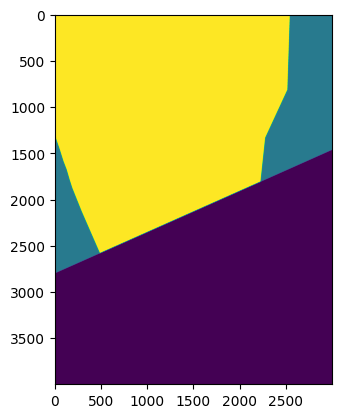

In [13]:
resolution = 1
from rasterio.features import rasterize
from rasterio.transform import from_origin

# Get the crop box
crop_box = env._create_crop_box(angle=90)

min_x, min_y, max_x, max_y = crop_box.bounds

# Determine the number of rows and columns of the raster
num_rows = int((max_y - min_y) / resolution)
num_cols = int((max_x - min_x) / resolution)

# Create a transformation matrix
transform = from_origin(min_x, max_y, resolution, resolution)
# Create the matrix
matrix = rasterize(depths_lands_inside, out_shape=(num_rows, num_cols), transform=transform, fill=-1)

plt.imshow(matrix, cmap='viridis')

In [1]:
import cv2
import numpy as np


matrix[-1,:] = (matrix[-2,:] + matrix[-3,:])/2
matrix[:,-1] = (matrix[:,-2] + matrix[:,-3])/2
matrix[0,:] = (matrix[1,:] + matrix[2,:])/2
matrix[:,0] = (matrix[:,1] + matrix[:,2])/2

# Convert the matrix to a floating-point image
matrix_float = matrix.astype(np.float32)

# Create a mask of missing values
mask = (matrix_float == -1).astype(np.uint8)

# Use inpaint to fill the missing values
matrix_filled = cv2.inpaint(matrix_float, mask, inpaintRadius=2, flags=cv2.INPAINT_NS)

plt.imshow(matrix_filled, cmap='viridis')

NameError: name 'matrix' is not defined